# Figure 2: Difference in Performance between different number of samples per site

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../outputs/run_compared_4000samples.csv')
df

,Unnamed: 0,error_angle_mean,error_angle_median,error_angle_std,N,k,n,kappa_within_site,site_lat,outlier_rate,ignore_outliers,site_long
0,0,3.405352,3.114680,1.866788,50,1,50,10.0,0,0.00,False,0
1,0,4.844222,4.427022,2.828988,50,5,10,10.0,0,0.00,True,0
2,0,3.763320,3.450987,2.039345,50,1,50,10.0,0,0.05,False,0
3,0,4.914245,4.503175,2.838521,50,5,10,10.0,0,0.05,True,0
4,0,4.148615,3.801551,2.301081,50,1,50,10.0,0,0.10,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...
795,0,12.966721,12.754300,3.548466,50,5,10,1000.0,90,0.05,True,0
796,0,13.468682,13.360851,2.565726,50,1,50,1000.0,90,0.10,False,0
797,0,12.896825,12.594985,3.554875,50,5,10,1000.0,90,0.10,True,0
798,0,14.779402,14.687479,3.489356,50,1,50,1000.0,90,0.20,False,0


In [118]:
outlier_rate = 0.1
df1 = df[(df.k==1) & (df.ignore_outliers==False) & (df.outlier_rate==outlier_rate)]
df5 = df[(df.k==5) & (df.ignore_outliers==True) & (df.outlier_rate==outlier_rate)]

# Filter 90 because those results look a little bit off
df1 = df1[df1.site_lat < 85]
df5 = df5[df5.site_lat < 85]
df5

,Unnamed: 0,error_angle_mean,error_angle_median,error_angle_std,N,k,n,kappa_within_site,site_lat,outlier_rate,ignore_outliers,site_long
5,0,4.986522,4.498299,2.854878,50,5,10,10.000000,0,0.1,True,0
13,0,4.629015,4.179391,2.729500,50,5,10,16.681005,0,0.1,True,0
21,0,4.362396,3.864338,2.636068,50,5,10,27.825594,0,0.1,True,0
29,0,4.135054,3.670471,2.544587,50,5,10,46.415888,0,0.1,True,0
37,0,4.086174,3.628457,2.535276,50,5,10,77.426368,0,0.1,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...
685,0,6.671809,6.193510,3.636836,50,5,10,129.154967,80,0.1,True,0
693,0,6.594718,6.142181,3.648667,50,5,10,215.443469,80,0.1,True,0
701,0,6.408485,5.961769,3.530445,50,5,10,359.381366,80,0.1,True,0
709,0,6.469963,6.023640,3.487597,50,5,10,599.484250,80,0.1,True,0


In [119]:
df1_tab = df1.pivot('kappa_within_site', 'site_lat', 'error_angle_mean')
df5_tab = df5.pivot('kappa_within_site', 'site_lat', 'error_angle_mean')

df_diff = df5_tab - df1_tab
df_diff = df_diff / df5_tab
df_diff

site_lat,0,10,20,30,40,50,60,70,80
kappa_within_site,,,,,,,,,
10.000000,0.168034,0.175554,0.170916,0.162337,0.156478,0.146828,0.152114,0.167861,0.186632
16.681005,0.218789,0.197096,0.232094,0.233662,0.211102,0.215466,0.224286,0.199852,0.197636
27.825594,0.246062,0.244530,0.260229,0.273928,0.259034,0.256957,0.259850,0.271938,0.252140
46.415888,0.254140,0.252265,0.293036,0.308066,0.309763,0.309441,0.304801,0.298215,0.296123
77.426368,0.280822,0.282535,0.293462,0.309087,0.324829,0.325417,0.321236,0.316999,0.316432
129.154967,0.261270,0.276241,0.301491,0.326985,0.337708,0.347163,0.334560,0.348966,0.347397
215.443469,0.281823,0.302058,0.308542,0.335954,0.365763,0.346091,0.361906,0.346191,0.365095
359.381366,0.283782,0.302328,0.301541,0.320107,0.354692,0.363980,0.374360,0.360325,0.365009
599.484250,0.302174,0.296935,0.312597,0.342531,0.357580,0.360215,0.378887,0.368443,0.377481


In [120]:
from scipy.ndimage.filters import gaussian_filter

def contour_from_pandas(df_, a_max=15):

    X = df_.columns.values
    Y = df_.index.values
    Z = df_.values
    Z_smooth = gaussian_filter(Z, 1.0)
    
    Z_rounded = np.round(Z, 2)
    
    x,y = np.meshgrid(X, Y)

    bounds = np.arange(-0.5, 0.5, .1)
    
    fig, ax = plt.subplots()
    fig.set_size_inches(12, 12)
    # ax.set_aspect("equal")
    
    ColorGrid = ax.pcolormesh(x, y, Z_rounded, cmap="seismic_r", alpha=0.8, vmin=-.5, vmax=.5)
    # CS1 = ax.contour(x, y, Z, 10, colors='k', levels=np.arange(0.0, 16.0, 1.0))
    ContourLines = ax.contour(x, y, Z, 10, colors='k', levels=bounds)
    # CS2 = ax.pcolormesh(x, y, Z, cmap='viridis', alpha=0.8)
    
    ax.clabel(ContourLines, inline=True, fontsize=14)
    ax.set_xticks(df_.columns.values)
    ax.set_yticks(df_.index.values)
    ax.set_yscale("log")
    # ax.set_xlim([0, np.max(df_.columns.values)])
    # ax.set_ylim([0, np.max(df_.index.values)])
    ax.set_xlabel('Paleolatude')
    ax.set_ylabel('Kappa')
    cbar = plt.colorbar(ColorGrid, boundaries=bounds, fraction=0.02, location='right')
    cbar.set_label("Difference between means squared error", rotation=270)
     
    plt.savefig("Figure1.png", dpi=300, format="png")

/tmp/ipykernel_745/4260704200.py:1: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


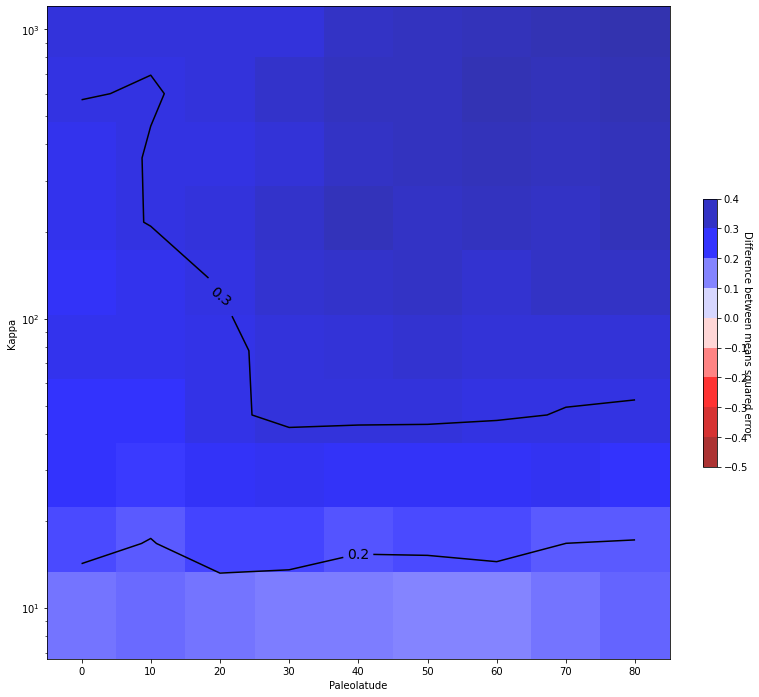

In [121]:
contour_from_pandas(df_diff)